In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
#Analyzing the DETE survey data - Top 5 rows

dete_survey.head()


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
#Analyzing the DETE survey data - Data Types and non-null values
print(dete_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.isnull().sum().sort_values(ascending = False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Opportunities for promotion             87
Career Aspirations                      76
Wellness programs                       56
Coach                                   55
Further PD                              54
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age                                     11
Peer support                            10
My say                                  10
Initiative                               9
Performance

In [6]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [7]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
02/2014         2
08/2012         2
07/2014         2
04/2014         2
09/2010         1
07/2006         1
07/2012         1
09/2014         1
2014            1
11/2012         1
2010            1
Name: Cease Date, dtype: int64

In [8]:
dete_survey['DETE Start Date'].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2010          27
2012          27
2009          24
2006          23
2013          21
1975          21
1970          21
1990          20
2005          20
1999          19
1996          19
1991          18
2000          18
2004          18
1992          18
1989          17
2003          15
1978          15
1976          15
1988          15
2002          15
1979          14
1998          14
1974          14
1997          14
1980          14
1995          14
1993          13
1986          12
1972          12
1977          11
1969          10
1971          10
1994          10
2001          10
1984          10
1983           9
1981           9
1985           8
1973           8
1987           7
1982           4
1963           4
1968           3
1967           2
1966           1
1965           1
Name: DETE Start Date, dtype: int64

In [9]:
# We can extract those columns, whereever the word 'dissatisfaction' appears
pattern_diss = r"satisfaction"
pattern_diss_bool = dete_survey.columns.str.contains(pattern_diss)

dete_survey.columns[pattern_diss_bool]

Index(['Job dissatisfaction', 'Dissatisfaction with the department'], dtype='object')

#### Findings on the DETE data :

    a) Start Date and End Date columns have 'Not Stated' instead of NaN and also they have different Year formats, which need to be standardized.  
    b) A few columns have very high null values, eg- Aboriginal, Torres Straight. They also don't have an impact on the outcome. Hence they can be dropped. 
    c) The columns that are related to Dissatisfaction are - 'Job dissatisfaction', 'Dissatisfaction with the department'

In [10]:
#Analyzing the TAFE survey data - Top 5 rows

tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [11]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [12]:
tafe_survey.isnull().sum().sort_values(ascending = False)

Main Factor. Which of these was the main factor for leaving?     589
InductionInfo. Topic:Did you undertake a Corporate Induction?    270
Contributing Factors. Travel                                     265
Contributing Factors. Other                                      265
Contributing Factors. Career Move - Public Sector                265
                                                                ... 
CESSATION YEAR                                                     7
Reason for ceasing employment                                      1
Institute                                                          0
WorkArea                                                           0
Record ID                                                          0
Length: 72, dtype: int64

In [13]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [14]:
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

In [15]:
# We can extract those columns, whereever the word 'dissatisfaction' appears
pattern_diss = r"satisfaction"
pattern_diss_bool = tafe_survey.columns.str.contains(pattern_diss)

tafe_survey.columns[pattern_diss_bool]

Index(['Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction'],
      dtype='object')

In [16]:
tafe_survey['WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job'].value_counts()

Agree                298
Strongly Agree       148
Neutral               91
Disagree              45
Strongly Disagree     22
Not Applicable         6
Name: WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job, dtype: int64

In [17]:
tafe_survey['Contributing Factors. Dissatisfaction'].value_counts()

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

#### Findings on the FATE data :

    a) The reasons for exit have been mentioned as survey questions. Their length can be reduced. Eg - Able to Cope with Stress etc.
    b) Contributing Factors can all be clubbed under a single variable. 
    c) The columns related to dissatisfaction are mentioned below :
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction'

#### Data set combination potential points :
    a) In both the datasets, there is a separation reason column and the contributing factors mentioned as multiple columns, a few of which include the word 'dissatisfaction'. These columns should be considered.  
    b) We can list the reasons together and also make the contributing factors into binary (0 and 1). 

In [18]:
## Re-reading the dete survey to treat 'Not Stated' values as NaN

dete_survey = pd.read_csv('dete_survey.csv', na_values ='Not Stated')



In [19]:
dete_survey['Cease Date'].value_counts(dropna = False)

2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2014      2
04/2013      2
02/2014      2
08/2012      2
07/2014      2
07/2006      1
09/2014      1
2014         1
11/2012      1
2010         1
09/2010      1
07/2012      1
Name: Cease Date, dtype: int64

#### Thus we can see that the NaN values are visible

In [20]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [21]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [22]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [23]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

#### The additional columns have been dropped and the null values are reflecting as NaN

#### The column names are being updated so that they can be standardized. Similar column names between the DETE and TAFE data sets are :
    a) ID -- Record ID
    b) Separation Type --- Reason for Ceasing Employment
    c) Cease Date --- Length of Service Overall
    d) Other longer columns which would be renamed to shorter forms

In [24]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [25]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [26]:
col_rename_mapping = {'Record ID': 'id' ,
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service' }

tafe_survey_updated = tafe_survey.rename(col_rename_mapping, axis = 1)

In [27]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal developmen

#### Further reduction of the data, to filter out only resigning employees as it is mentioned in one of the client questions. 

In [41]:
dete_survey_updated.separationtype.value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [40]:
tafe_survey_updated.separationtype.value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [39]:
dete_resignations = dete_survey_updated.copy()[dete_survey_updated['separationtype'].str[:11] =='Resignation']
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [42]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype'] =='Resignation']
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

#### Thus, we have filtered out only those employee exits, where the separation type is 'Resignation'

#### Verifiying the duration data columns to check out any inconsistencies. 

In [49]:
dete_resignations['cease_date'].value_counts(dropna = False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

#### To clean up this column, we can use an apply method that extracts the year, based on string length. 

In [58]:
def year_update(yr_str):
    str_len = len(str(yr_str))
    if yr_str == np.NaN:
        return_value = yr_str
    elif str_len <=4:
        return_value = yr_str
    else:
        return_value = yr_str[3:]
    return return_value
            

dete_resignations['cease_date'] = dete_resignations['cease_date'].apply(year_update)
dete_resignations['cease_date'].value_counts(dropna = False)

2013    146
2012    129
2014     22
NaN      11
2010      2
2006      1
Name: cease_date, dtype: int64

In [60]:
## Converting the column data type to float after making the format consistent.

dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

dete_resignations['cease_date'].dtype



dtype('float64')

In [62]:
dete_resignations['dete_start_date'].value_counts(dropna = False).sort_index(ascending = False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
NaN       28
Name: dete_start_date, dtype: int64

In [63]:
dete_resignations['dete_start_date'].dtype

dtype('float64')

<AxesSubplot:>

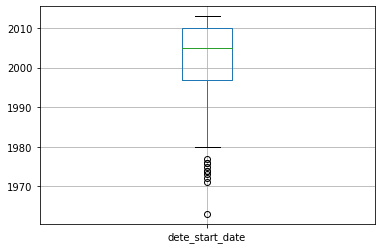

In [64]:
dete_resignations.boxplot(column = 'dete_start_date')

#### The columns have been cleaned to display only the year and the format has also been converted to float. 

#### Creating a new column to calculate the number of years of service. 

In [70]:
bool_contains_service = tafe_resignations.columns.str.contains('service')
tafe_resignations.columns[bool_contains_service]

Index(['institute_service', 'role_service'], dtype='object')

In [72]:
tafe_resignations['institute_service'].value_counts(dropna = False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

#### Since the tafe dataset contains a similar column containing the years of service, we will keep the same name in the dete dataset as well, while creating the 'number of years of service' column

In [73]:
bool_contains_date = dete_resignations.columns.str.contains('date')
dete_resignations.columns[bool_contains_date]

Index(['cease_date', 'dete_start_date', 'role_start_date'], dtype='object')

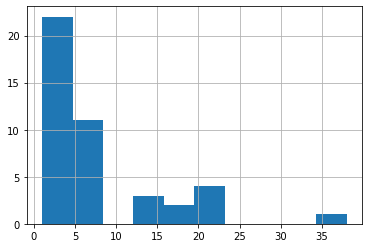

In [86]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

dete_resignations['institute_service'].value_counts(dropna = False).sort_index(ascending = False).hist()
plt.show()

In [85]:
cols = ['cease_date', 'dete_start_date', 'institute_service']

dete_resignations[dete_resignations['institute_service'].isnull()][cols].head()

,cease_date,dete_start_date,institute_service
16,2012.0,NaN,NaN
39,2012.0,NaN,NaN
106,2012.0,NaN,NaN
140,2012.0,NaN,NaN
196,2012.0,NaN,NaN


#### Thus we have created a column containing the years of service. But it has 38 null values since either the start date or the cease date have null entries. Hence these rows are not relevant to our analysis and should be dropped or ignored in our analysis.

#### Checking for column names indicating dissatisfaction in both the data sets.

In [88]:

dete_resignations.head()  



,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [89]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,NaN,NaN,NaN,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Yes,Yes,Yes,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,No,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [91]:
def col_name_contains(ip_col_list, check_string):
    bool_col_list = ip_col_list.str.contains(check_string)
    return bool_col_list

In [92]:
dete_col_list = dete_resignations.columns

dete_col_list[col_name_contains(dete_col_list,'satisfaction')]

Index(['job_dissatisfaction', 'dissatisfaction_with_the_department'], dtype='object')

In [95]:
tafe_col_list = tafe_resignations.columns

tafe_col_list[col_name_contains(tafe_col_list,'Contributing')]

Index(['Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE'],
      dtype='object')

In [96]:
tafe_col_list[col_name_contains(tafe_col_list,'Workplace')]

Index(['Induction. Did you undertake Workplace Induction?',
       'Workplace. Topic:Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?',
       'Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?',
       'Workplace. Topic:Does your workplace promote and practice the principles of employment equity?',
       'Workplace. Topic:Does your workplace value the diversity of its employees?',
       'Workplace. Topic:Would you recommend the Institute as an employer to others?'],
      dtype='object')

In [97]:
tafe_col_list[col_name_contains(tafe_col_list,'[Ss]atisfaction')]

Index(['Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction'],
      dtype='object')

In [98]:
tafe_resignations[tafe_col_list[col_name_contains(tafe_col_list,'[Ss]atisfaction')]].head()

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction
3,-,-,Strongly Agree
4,-,-,Strongly Agree
5,-,-,Disagree
6,-,-,Strongly Agree
7,-,-,Disagree


In [99]:
tafe_resignations[tafe_col_list[col_name_contains(tafe_col_list,'Contributing')]].head()

,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE
3,-,-,-,-,-,-,-,-,-,Travel,-,-
4,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-
5,-,-,-,-,-,-,-,-,-,-,Other,-
6,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-
7,-,-,-,-,-,-,-,-,-,-,Other,-


In [101]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

#### Now that we have analyzed the columns for their content related to dissatisfaction, we will create a shortlist of all columns indicating dissatisfaction and make their values consistent with 'True', 'False' and 'NaN.

In [103]:
dete_dissat_col_list = [ 'job_dissatisfaction', 
        'dissatisfaction_with_the_department',
       'lack_of_recognition',
       'lack_of_job_security', 
        'employment_conditions',
       'work_life_balance', 
        'workload']

In [107]:
tafe_dissat_col_list = ['Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction']

In [121]:
tafe_resignations[tafe_dissat_col_list]['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [120]:
tafe_resignations[tafe_dissat_col_list]['Contributing Factors. Job Dissatisfaction'].value_counts(dropna =False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [113]:
def update_vals(element):
    if pd.isnull(element):
        return_value = np.nan
    elif element == '-':
        return_value = np.nan
    else:
        return_value = True
    return return_value


test = tafe_resignations[tafe_dissat_col_list].applymap(update_vals)        
        
    
## Testing the functionality of the function before implementing it on the actual dataset    

In [117]:
test.columns

Index(['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction'], dtype='object')

In [119]:
test['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

NaN     285
True     55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [122]:
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)

In [124]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

NaN     285
True     55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [125]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

In [126]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

NaN     278
True     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [127]:
dete_dissat_col_list

['job_dissatisfaction',
 'dissatisfaction_with_the_department',
 'lack_of_recognition',
 'lack_of_job_security',
 'employment_conditions',
 'work_life_balance',
 'workload']

In [131]:
for col in dete_dissat_col_list:
    print('Value counts for ', col, 'are')
    print(dete_resignations[col].value_counts(dropna = False))
    print('\n')

Value counts for  job_dissatisfaction are
False    270
True      41
Name: job_dissatisfaction, dtype: int64


Value counts for  dissatisfaction_with_the_department are
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64


Value counts for  lack_of_recognition are
False    278
True      33
Name: lack_of_recognition, dtype: int64


Value counts for  lack_of_job_security are
False    297
True      14
Name: lack_of_job_security, dtype: int64


Value counts for  employment_conditions are
False    288
True      23
Name: employment_conditions, dtype: int64


Value counts for  work_life_balance are
False    243
True      68
Name: work_life_balance, dtype: int64


Value counts for  workload are
False    284
True      27
Name: workload, dtype: int64




#### Thus the values for all 'dissatisfaction' related columns have been made consistent to have True, False or NaN values. Now we will create another 'True/False' column called 'dissatisfaction' that would indicate dissatisfaction across any column. 

In [132]:
test = dete_resignations[dete_dissat_col_list].any(axis=1)
test.head()

3     False
5      True
8     False
9      True
11    False
dtype: bool

In [133]:
dete_resignations[dete_dissat_col_list].head()

,job_dissatisfaction,dissatisfaction_with_the_department,lack_of_recognition,lack_of_job_security,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False
11,False,False,False,False,False,False,False


In [134]:
## Implementing the boolean after testing

dete_resignations['dissatisfaction'] = dete_resignations[dete_dissat_col_list].any(axis=1)
dete_resignations['dissatisfaction'].value_counts(dropna = False)

False    171
True     140
Name: dissatisfaction, dtype: int64

In [135]:
tafe_resignations['dissatisfaction'] = tafe_resignations[tafe_dissat_col_list].any(axis=1)
tafe_resignations['dissatisfaction'].value_counts(dropna = False)

False    249
True      91
Name: dissatisfaction, dtype: int64

In [138]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [139]:
tafe_resignations_up['dissatisfaction'].value_counts(dropna = False)

False    249
True      91
Name: dissatisfaction, dtype: int64

In [140]:
dete_resignations_up['dissatisfaction'].value_counts(dropna = False)

False    171
True     140
Name: dissatisfaction, dtype: int64

#### Now that we have standardized the 'dissatisfaction' readings across both data sets, we will work on other factors, such as age and experience levels, but before that, we will combine both the data sets. 

In [141]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'


In [150]:
combined = pd.concat([dete_resignations_up , tafe_resignations_up], axis = 0, join = 'outer', ignore_index = True)

combined.shape

(651, 102)

In [151]:
dete_resignations_up.shape + tafe_resignations_up.shape

(311, 38, 340, 74)

In [152]:
combined.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,InductionInfo. Induction Manual Topic:Did you undertake a Institute Induction?,InductionInfo. Face to Face Topic: Did you undertake Team Induction; Category?,InductionInfo. On-line Topic: Did you undertake Team Induction?process you undertook and how it was conducted.],InductionInfo. Induction Manual Topic: Did you undertake Team Induction?,Workplace. Topic:Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
combined.isnull().sum().sort_values(ascending = False)

torres_strait      651
south_sea          648
aboriginal         644
disability         643
nesb               642
                  ... 
cease_date          16
separationtype       0
dissatisfaction      0
institute            0
id                   0
Length: 102, dtype: int64

In [157]:
combined.notnull().sum().sort_values(ascending = True)

torres_strait        0
south_sea            3
aboriginal           7
disability           8
nesb                 9
                  ... 
cease_date         635
separationtype     651
institute          651
dissatisfaction    651
id                 651
Length: 102, dtype: int64

In [158]:
combined_updated = combined.dropna(axis = 1, thresh = 500)
combined_updated.notnull().sum().sort_values(ascending = True)

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
id                   651
separationtype       651
dissatisfaction      651
institute            651
dtype: int64

#### Thus we have combined the datasets and dropped the columns with less than 500 null values. We can now proceed towards standardizing the 'years of experience' related columns. 

In [181]:
tafe_specificchar_list = ['year', '-', np.nan]


service_index = combined_updated['institute_service'].value_counts().index

'''for char in tafe_specific_char_list:
    bool_char = service_index.str.contains(char)
    index_elements_char = service_index[bool_char]
    print(index_elements_char)'''
    
    
service_index

Index([  'Less than 1 year',                '1-2',                '3-4',
                      '5-6',              '11-20',                  5.0,
                        1.0,               '7-10',                  0.0,
                        3.0,                  6.0,                  4.0,
                        9.0,                  2.0,                  7.0,
       'More than 20 years',                 13.0,                  8.0,
                       15.0,                 20.0,                 17.0,
                       10.0,                 14.0,                 22.0,
                       12.0,                 16.0,                 18.0,
                       24.0,                 11.0,                 23.0,
                       39.0,                 19.0,                 32.0,
                       21.0,                 26.0,                 25.0,
                       28.0,                 36.0,                 30.0,
                       38.0,                 27.0, 

In [200]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

<ipython-input-200-02b08863a30c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)


In [201]:
combined_updated['institute_service'].value_counts(dropna = False)

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
12.0                   6
17.0                   6
22.0                   6
14.0                   6
10.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
21.0                   3
19.0                   3
32.0                   3
30.0                   2
28.0                   2
36.0                   2
26.0                   2
25.0                   2


In [215]:
tafe_specificchar_list = ['year', '-']

service_index = combined_updated['institute_service'].value_counts(dropna = False).index

print(service_index[service_index.str.contains('nan')])
print(service_index[service_index.str.contains('year')])
print(service_index[service_index.str.contains('-')])

Index(['nan'], dtype='object')
Index(['Less than 1 year', 'More than 20 years'], dtype='object')
Index(['1-2', '3-4', '5-6', '11-20', '7-10'], dtype='object')


In [216]:
years = combined_updated['institute_service'].astype(str)

In [227]:
years.head()

0     7.0
1    18.0
2     3.0
3    15.0
4     3.0
Name: institute_service, dtype: object

In [234]:
years = years.str.replace('Less than 1 year', '0')
years = years.str.replace('More than 20 years', '20')
years = years.str.split('-').str.get(0)

In [239]:
years = years.astype(float)

In [244]:
combined_updated['institute_service'] = years

<ipython-input-244-29ad7493f989>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = years


#### Now we will create a new categorical column which will map the above experience levels into the below categories :


    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

In [288]:
def years_to_bucket(element):
    element = float(element)
    
    if pd.isnull(element):
        return_value = np.nan    
    if element <=3:
        return_value = 'New : Less than 3 years'
    elif (element > 3) & (element <=6):
        return_value = 'Experienced : 3-6 years'
    elif (element > 6) & (element <=10):
        return_value = 'Established : 6-10 years'
    else:
        return_value = 'Veteran : More than 10 years'
    return return_value

 

In [289]:
years_to_bucket(10.5)

'Veteran : More than 10 years'

In [290]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(years_to_bucket)

<ipython-input-290-a20fcd43cd66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service'].apply(years_to_bucket)


In [291]:
combined_updated['service_cat'].value_counts()

New : Less than 3 years         276
Veteran : More than 10 years    224
Experienced : 3-6 years          89
Established : 6-10 years         62
Name: service_cat, dtype: int64

#### The experience levels have been grouped into 4 categories. 

#### We can now check for missing values in the 'dissatisfied' column and try to clean the same.

In [292]:
combined_updated['dissatisfaction'].value_counts(dropna = False)

False    420
True     231
Name: dissatisfaction, dtype: int64

#### Since there are no missing values, we will now plot the experience level categories of the dissatisfied employees to observe the composition.

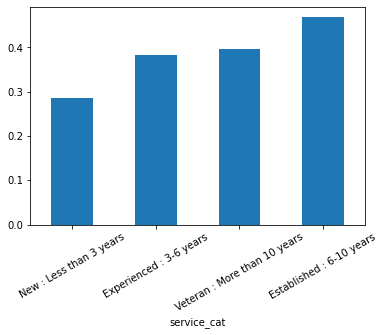

In [294]:
pv_dissatisfaction_exp = combined_updated.pivot_table('dissatisfaction','service_cat')

%matplotlib inline
pv_dissatisfaction_exp.sort_values(by = 'dissatisfaction').plot.bar(legend = False)
plt.xticks(rotation = 30)
plt.show()

## Conclusion - Dissatisfaction and Years of Service.

Thus, the analysis suggests that employees under the 'Established' category (7-10) years are the most dissatisfied (at about 47%). Dissatisfaction peaks between 7-10 years and then comes down. New Employees with less than 3 years of service have a lower dissatisfaction score (29%). Employees with both 3-6 years and more than 10 years have similar dissatisfaction levels (about 38-39%). Thus we can consider a correlation between experience levels and dissatisfaction, for the first three stages of the employee's career. 
##### Possible reasons could be :
    a) Employees with less than 3 years of service resigned quickly and had a tendency to change jobs. Hence they reported lower levels of dissatisfaction. 
    b) Veterans (more than 10 years of service) focus more on other areas of life and hence have less expectations from the organization. Therefore they reported lower levels of dissatisfaction. 
    c) Established people, with more than 6 years of service didn't change jobs and hence expected more. But due to pyramidal structures, they got fewer opportunities and hence expressed the highest levels of dissatisfaction. 

#### A similar analysis can be carried out for age as well

In [287]:
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [308]:
ages = combined_updated['age'].astype(str)
ages = combined_updated['age'].str[:2]


In [311]:
ages.value_counts(dropna = False).sort_index()

20     10
21     62
26     67
31     61
36     73
41     93
46     81
51     71
56     55
61     23
NaN    55
Name: age, dtype: int64

In [337]:
combined_updated['age'] = ages

<ipython-input-337-fd2025c287d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['age'] = ages


In [340]:
combined_updated['age'] = combined_updated['age'].astype(float)

<ipython-input-340-390faecb8d40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['age'] = combined_updated['age'].astype(float)


#### Dividing the ages into categories:

In [341]:
def age_cat(element):
    #element = float(element)
    if pd.isnull(element):
        return_value = np.nan
    elif (element > 19) & (element <=30):
        return_value = '20-30'
    elif (element > 30) & (element <=40):
        return_value = '30-40'
    elif (element > 40) & (element <=50):
        return_value = '40-50'
    else:
        return_value = '51 and older'
    return return_value


In [342]:
combined_updated['age_cat'] = combined_updated['age'].apply(age_cat)
combined_updated['age_cat'].value_counts()

<ipython-input-342-317616f9d4a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['age_cat'] = combined_updated['age'].apply(age_cat)


40-50           174
51 and older    149
20-30           139
30-40           134
Name: age_cat, dtype: int64

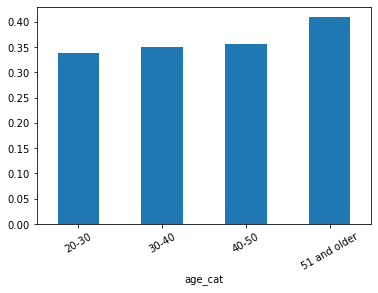

In [344]:
pv_dissat_age_cat = combined_updated.pivot_table('dissatisfaction', 'age_cat')

pv_dissat_age_cat.plot.bar(legend = False)
plt.xticks(rotation = 30)
plt.show()

## Conclusions - Age and Dissatisfaction

Based on the analysis, we can observe that dissatisfaction levels increase with age and among the age group '51 and older', the dissatisfaction is the highest, at 41%. 